# 과제물 : 회귀분석_예측

### 목표변수 FAT를 예측하기 위한 파생변수(BMI 등)를  생성하여 회귀분석을 실시하여 결과를 해석하고, predict method를 이용하여 예측값을 구하시오.

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

matplotlib.rc("font", family= 'Noto Sans CJK JP')
matplotlib.rc("axes", unicode_minus= False)


import warnings
warnings.filterwarnings("ignore")

In [2]:
df_raw=pd.read_csv("/home/piai/바탕화면/2. Big Data 분석/Concrete.csv", encoding="euc-kr")
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### 체질검사.csv 데이터를 df_raw 변수에 불러와 넣어주고, head() 함수를 통하여 데이터 셋의 앞의 5개를 확인해주었습니다.

In [6]:
df_train, df_test = train_test_split(df_raw, test_size=0.3, random_state=1234)

In [7]:
reg_model=smf.ols(formula="strength ~cement+blast_furnace_slag+fly_ash+water+superplasticizer+coarse_aggregate+fine_aggregate+age", data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     144.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          9.94e-144
Time:                        09:21:06   Log-Likelihood:                -2714.7
No. Observations:                 721   AIC:                             5447.
Df Residuals:                     712   BIC:                             5489.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -55.7671     34

In [14]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수", r2_score(df_train['strength'], train_pred))
print("test data의 결정계수", r2_score(df_test['strength'], test_pred))


train data의 결정계수 0.6191805821765541
test data의 결정계수 0.6004271385915773


#### 최초 test data의 성능은 약 67.8%입니다. 점차적으로 변수를 제거해가면서 회귀모형의 설명력이 높고,  test 데이터 성능이 좋은 쪽으로 모델링을 할 것입니다. 

In [10]:
df_train_x=df_train.drop('strength', axis=1)
df_train_x_const= add_constant(df_train_x)

df_vif= pd.DataFrame()
df_vif["variable"]= df_train_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_train_x_const.values,i) 
               for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
8,age,1.12
5,superplasticizer,3.08
6,coarse_aggregate,5.34
3,fly_ash,6.60
4,water,7.80
7,fine_aggregate,7.94
2,blast_furnace_slag,7.97
1,cement,8.08
0,const,7550.34


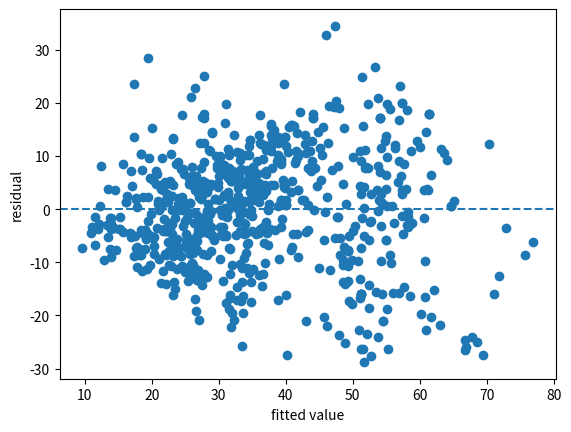

In [11]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

#### 잔차가 y=0 기준으로 랜덤하게 분포하고 있으므로 등분산성을 만족한다고 볼 수 있습니다.

# 잔차의 가정 확인 : 정규성 검정

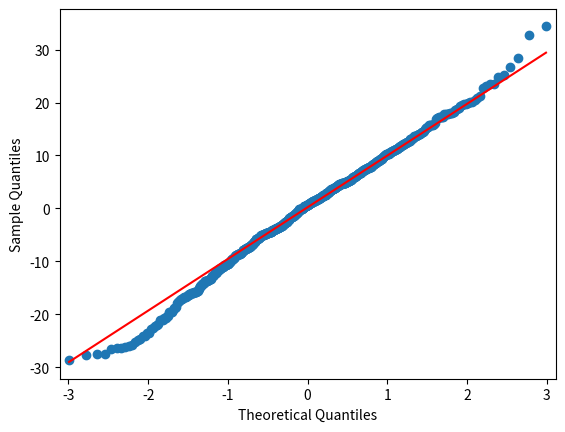

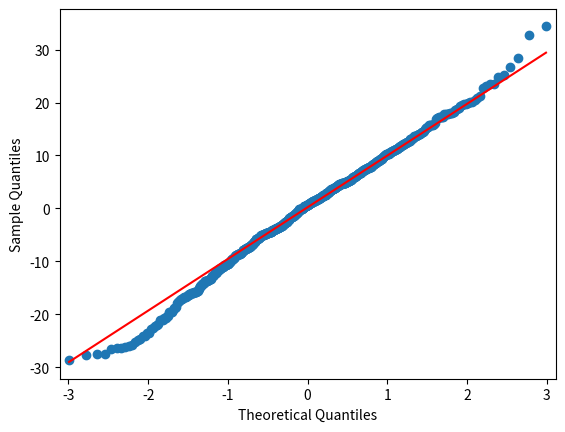

In [12]:
qqplot(reg_result.resid, line="q")

#### 적색 선을 따라서 분포하므로 정규분포를 따른다고 볼 수 있습니다.

# 잔차의 가정 확인 : 독립성 검정

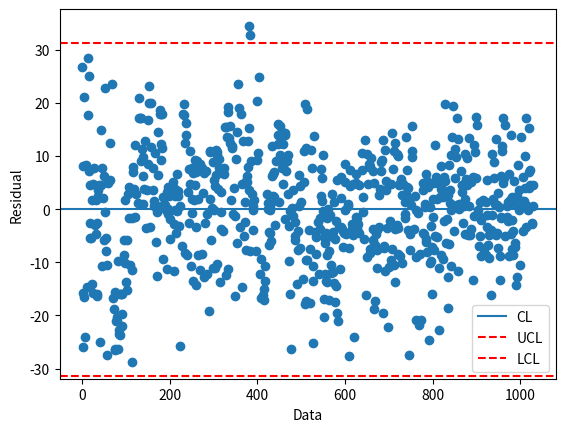

In [13]:
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data"); plt.ylabel("Residual")
plt.axhline(y=0, linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--",color="red", label='UCL')
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="dashed",color="red", label='LCL')
plt.legend(); plt.show()

In [ ]:
reg_model=smf.ols(formula="strength ~cement+blast_furnace_slag+fly_ash+water+superplasticizer+coarse_aggregate+fine_aggregate+age", data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     144.7
Date:                Mon, 07 Aug 2023   Prob (F-statistic):          9.94e-144
Time:                        09:21:06   Log-Likelihood:                -2714.7
No. Observations:                 721   AIC:                             5447.
Df Residuals:                     712   BIC:                             5489.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -55.7671     34

In [ ]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수", r2_score(df_train['strength'], train_pred))
print("test data의 결정계수", r2_score(df_test['strength'], test_pred))


train data의 결정계수 0.6191805821765541
test data의 결정계수 0.6004271385915773


#### 최초 test data의 성능은 약 67.8%입니다. 점차적으로 변수를 제거해가면서 회귀모형의 설명력이 높고,  test 데이터 성능이 좋은 쪽으로 모델링을 할 것입니다. 

In [ ]:
df_train_x=df_train.drop('strength', axis=1)
df_train_x_const= add_constant(df_train_x)

df_vif= pd.DataFrame()
df_vif["variable"]= df_train_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_train_x_const.values,i) 
               for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
8,age,1.12
5,superplasticizer,3.08
6,coarse_aggregate,5.34
3,fly_ash,6.60
4,water,7.80
7,fine_aggregate,7.94
2,blast_furnace_slag,7.97
1,cement,8.08
0,const,7550.34


In [3]:
df_raw.isnull().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
GENDER     0
dtype: int64

#### 각 변수별로 결측치가 얼마나 있는지 확인해주었습니다. 결측치가 없기에 별다른 처리없이 분석을 진행하였습니다.

#### 이상치는 데이터 수가 매우 적다고 판단하여, 따로 처리해주지 않았습니다. 데이터 수가 많았다면 이상치를 처리해주었을 것입니다.

In [4]:
df_raw[['WEIGHT','WEIGHT_UNIT']]=df_raw['WEIGHT'].str.split(expand=True)
df_raw[['HEIGHT','HEIGHT_UNIT']]=df_raw['HEIGHT'].str.split(expand=True)
df_raw['WEIGHT']=df_raw["WEIGHT"].astype('float64')
df_raw['HEIGHT']=df_raw["HEIGHT"].astype('float64')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


#### 'WEIGHT' , 'HEIGHT' 변수에는 단위값까지 같이 존재하기 때문에 str.split을 통해 분리해주고 각각 다른 변수에 지정해주었습니다.  'WEIGHT','HEIGHT' 열의 값들은 숫자로 변환하고 info() 함수로 확인해주었습니다.

In [5]:
df_raw=df_raw.drop(['WEIGHT_UNIT','HEIGHT_UNIT'],axis=1)

#### 분석을 진행하는데, 단위는 불필요하기 때문에 변수에서 제거해주었습니다.

In [6]:
df_raw.head(10)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성
5,24.2,40,202.25,70.00,38.5,106.5,100.9,106.2,63.5,39.9,22.6,35.1,30.6,19.0,남성
6,23.3,52,167.00,67.75,37.5,102.7,91.0,98.9,57.1,36.7,22.3,31.6,27.5,17.9,남성
7,26.0,54,230.00,72.25,42.5,119.9,110.4,105.5,64.2,42.7,27.0,38.4,32.0,19.6,남성
8,9.0,47,184.25,74.50,37.3,99.6,88.8,101.4,57.4,39.6,24.6,30.3,27.9,17.8,여성
9,4.0,47,127.50,66.75,34.0,83.4,70.4,87.2,50.6,34.4,21.9,26.8,25.8,16.8,여성


#### head()함수를 통해 'WEIGHT_UNIT','HEIGHT_UNIT'가 삭제되었는지 확인해주었습니다.

In [7]:
df_raw["WEIGHT"]= 0.45*df_raw["WEIGHT"]
df_raw["HEIGHT"]= 2.54*df_raw["HEIGHT"]

#### 'WEIGHT'는 단위가 lb, 'HEIGHT' 단위가 inch 이므로 각각 0.45와 2.54를 곱해주어 Kg, cm로 단위를 변경해주었습니다.

In [8]:
df_raw.head(5)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,163.4175,183.515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,75.6000,180.975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,79.9875,173.990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,66.4875,167.005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,98.5500,162.560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


#### head()함수를 통해 'WEIGHT','HEIGHT'가 변화되었는지 확인해주었습니다.

In [9]:
df_raw["BMI"] = df_raw["WEIGHT"] / ((df_raw["HEIGHT"] / 100) ** 2)

#### BMI는 몸무게(kg) / 키(m)의 제곱 이므로 새로운 변수 'BMI'에 값을 입력해주었습니다.

In [10]:
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER,BMI
0,35.2,46,163.4175,183.515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성,48.523870
1,11.8,27,75.6000,180.975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성,23.082595
2,22.2,69,79.9875,173.990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성,26.422478
3,10.6,57,66.4875,167.005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성,23.838617
4,47.5,51,98.5500,162.560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성,37.293165


#### 'BMI'가 잘 입력되었는지 head() 함수를 통해 확인해주었습니다.

In [11]:
df_raw=df_raw.drop(['WEIGHT','HEIGHT'],axis=1)

#### 'WEIGHT','HEIGHT' 변수를 통해 BMI 파생변수를 만들어주었기 때문에 만들어줄 때 사용하였던 'WEIGHT','HEIGHT' 두 변수는 제거하여주었습니다.

In [12]:
df_raw_dummy=pd.get_dummies(df_raw,drop_first=True)
df_raw_dummy.head()

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI,GENDER_여성
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.523870,0
1,11.8,27,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,23.082595,0
2,22.2,69,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,26.422478,0
3,10.6,57,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,23.838617,1
4,47.5,51,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.293165,1


#### 범주형 변수 'GENDER_여성'을 변화시켜주기 위해서 get_dummies를 이용하여 남성을 0, 여성을 1로 변환해주었습니다.

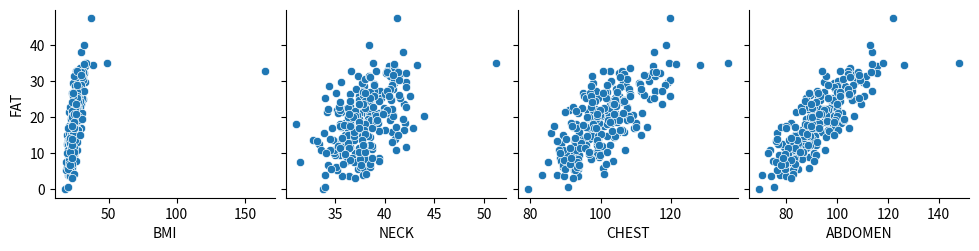

In [13]:
sns.pairplot(df_raw_dummy, y_vars="FAT", x_vars=["BMI","NECK","CHEST","ABDOMEN"])

#### 'BMI','NECK','CHEST','ABDOMEN' 변수에 대하여 산점도를 그려 시각화하여 줍니다. NECK은  약하지만 ,나머지 변수들은 적당한 선형성이 있다고 판단하였습니다.

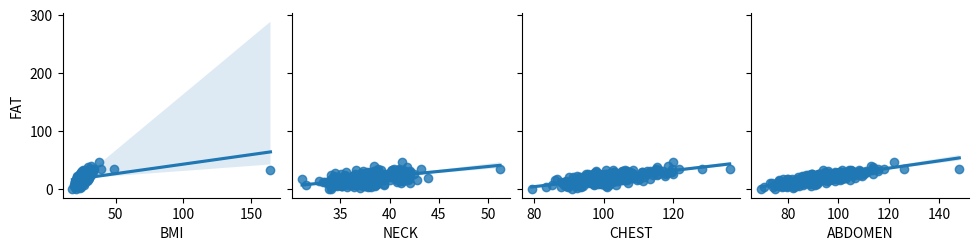

In [14]:
sns.pairplot(df_raw_dummy, y_vars="FAT", x_vars=["BMI","NECK","CHEST","ABDOMEN"], kind="reg")

#### 'BMI','NECK','CHEST','ABDOMEN' 변수에 대하여 산점도를 그려 시각화한 것에 회귀 적합선을 추가하여 확인하여 주었습니다. 4개의 변수가 약한 선형관계가 있는 것으로 보았습니다.

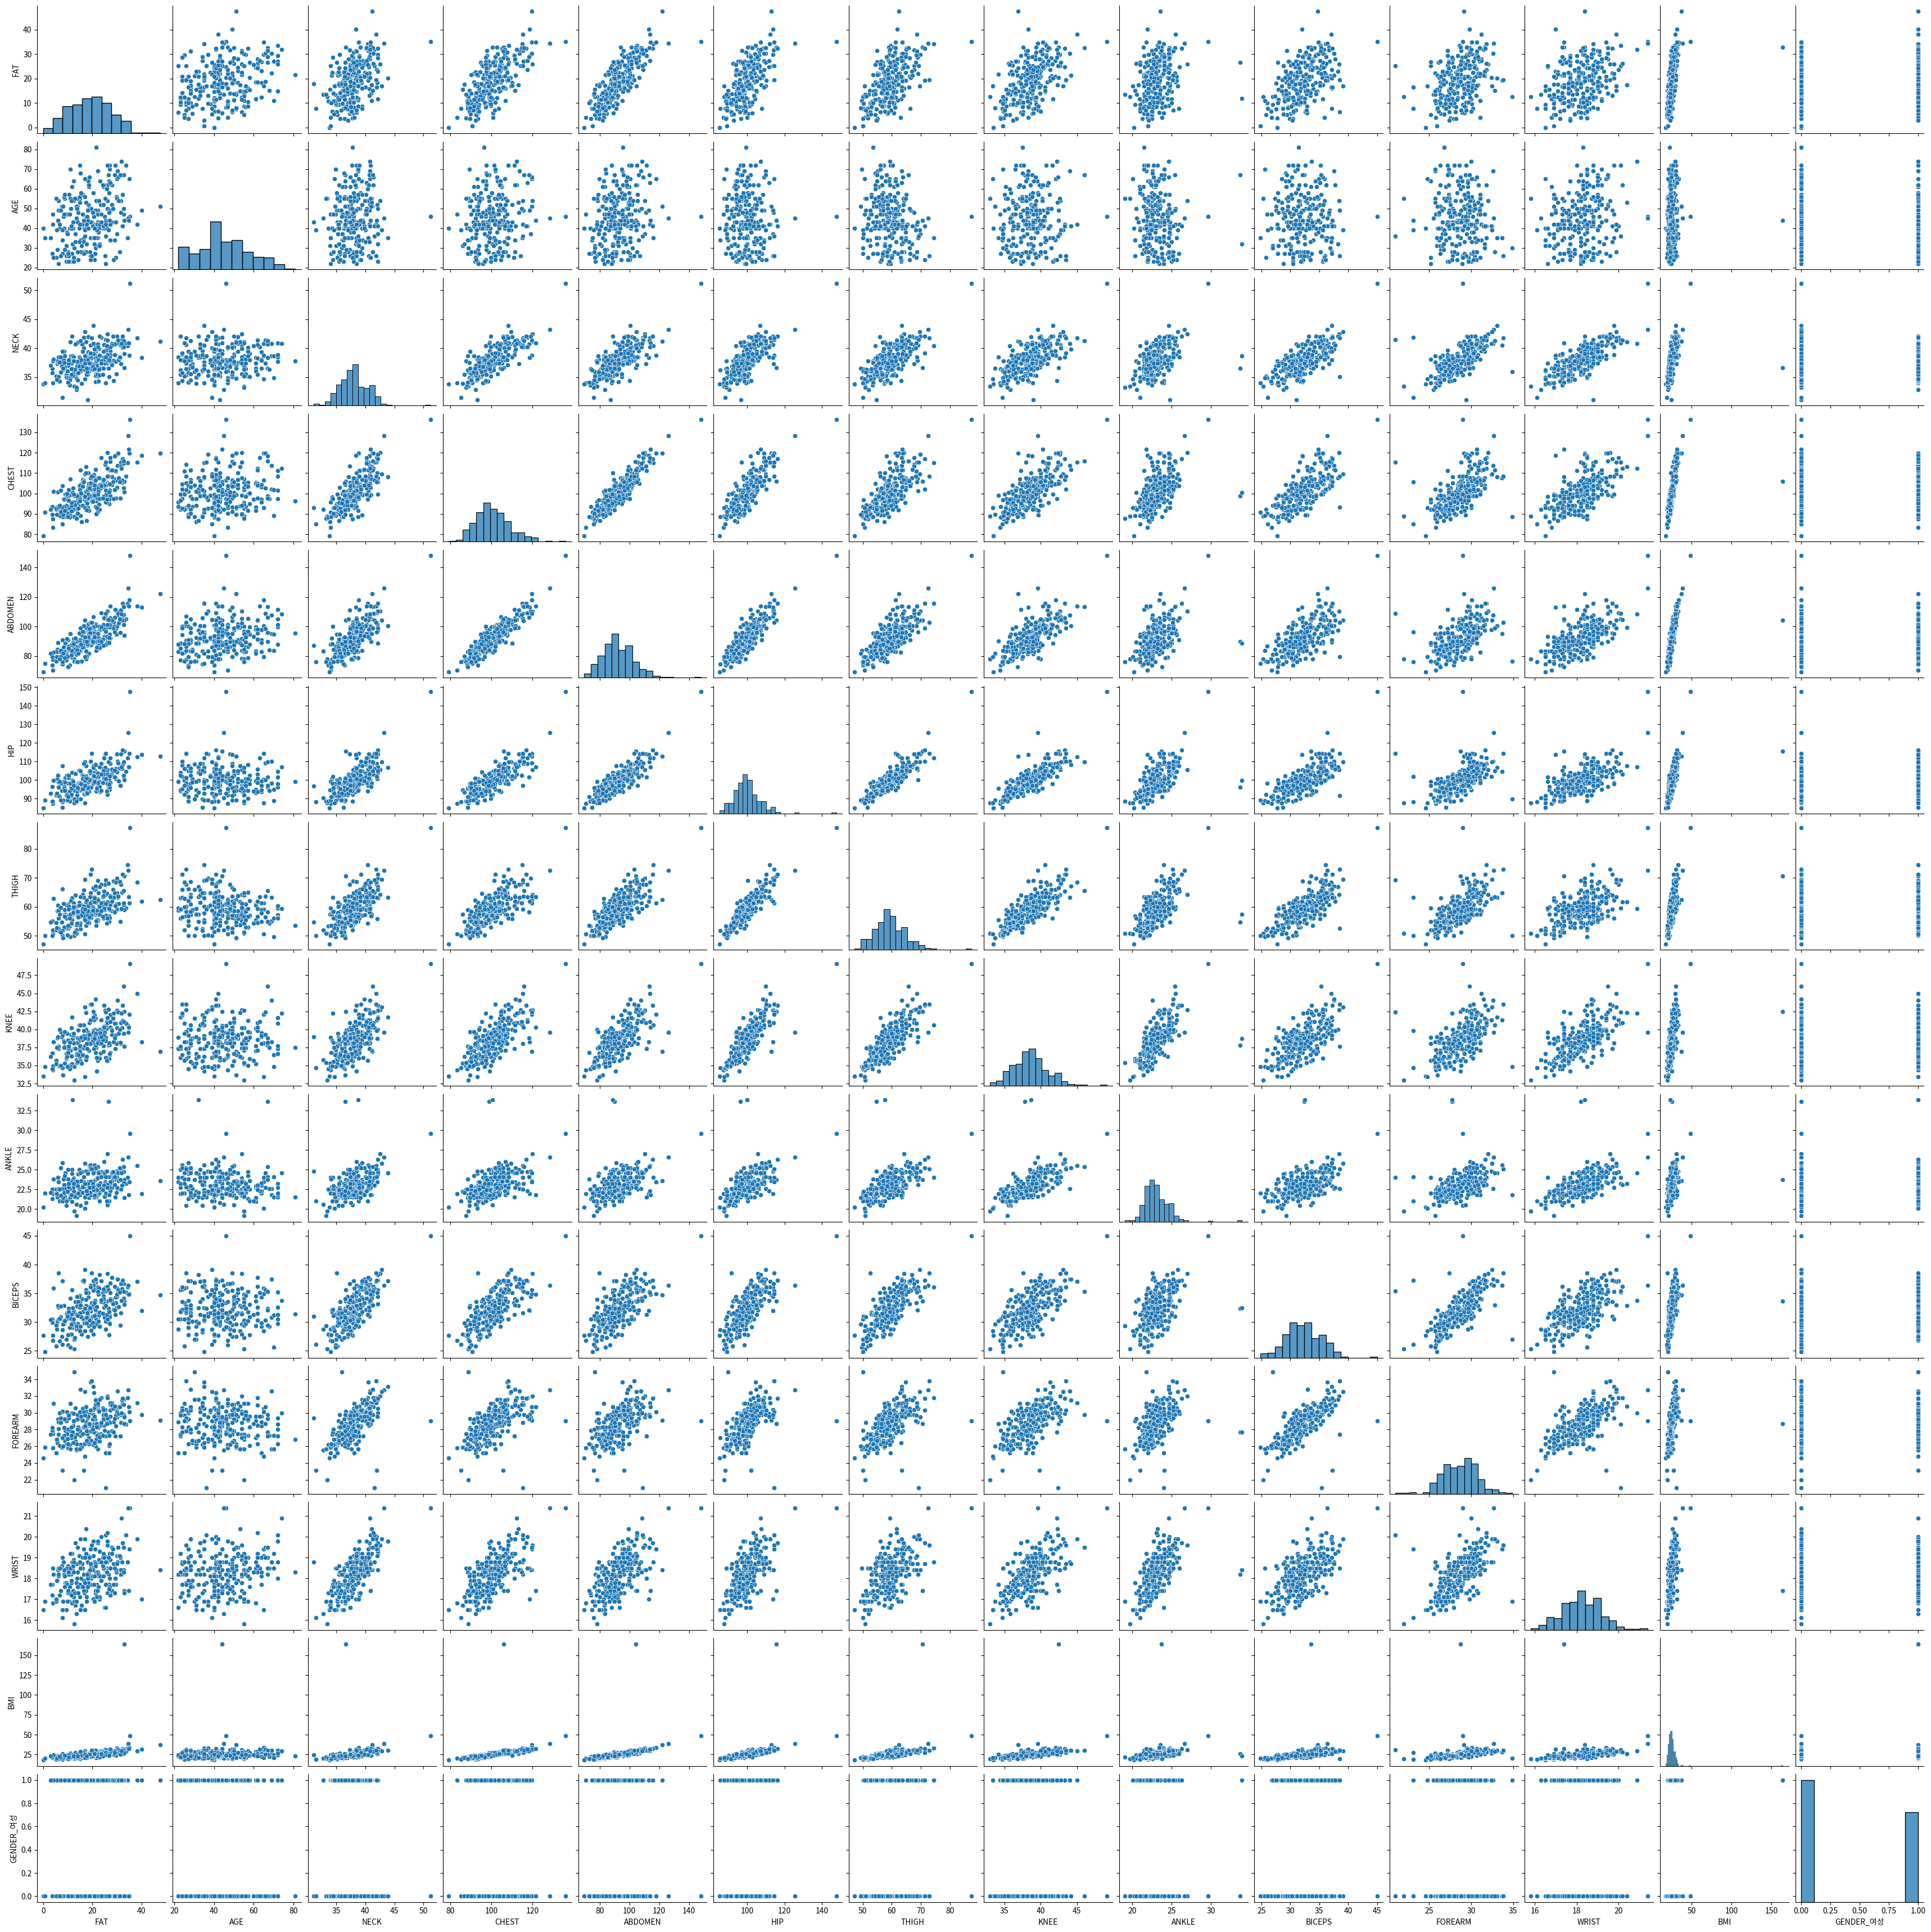

In [15]:
sns.pairplot(df_raw_dummy)

#### 전체 변수에 관한 산점도 행렬을 보고 데이터 경향성을 눈으로 확인하였습니다.

In [16]:
df_raw_dummy.corr().round(3)

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,BMI,GENDER_여성
FAT,1.000,0.291,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347,0.371,-0.033
AGE,0.291,1.000,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214,0.040,-0.063
NECK,0.491,0.114,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745,0.266,0.010
CHEST,0.703,0.176,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660,0.383,-0.014
ABDOMEN,0.813,0.230,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620,0.415,-0.017
HIP,0.625,-0.050,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630,0.462,-0.042
THIGH,0.560,-0.200,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559,0.433,-0.040
KNEE,0.509,0.018,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665,0.364,-0.034
ANKLE,0.266,-0.105,0.478,0.483,0.453,0.558,0.540,0.612,1.000,0.485,0.419,0.566,0.210,-0.012
BICEPS,0.493,-0.041,0.731,0.728,0.685,0.739,0.761,0.679,0.485,1.000,0.678,0.632,0.311,0.040


#### 변수들간 상관계수를 확인해주었습니다. 상관도가 떨어지는 것은 GENDER_여성입니다.

In [17]:
df_train, df_test = train_test_split(df_raw_dummy, test_size=0.4, random_state=6659)

#### Train data 60%, test data 40%를 나누고 random_state=6659. 데이터 재현성을 확보해주었습니다.

In [18]:
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (151, 14)
test data size: (101, 14)


#### 나눠진 데이터의 변수개수와 데이터 행 개수를 확인해주었습니다.

In [19]:
reg_model=smf.ols(formula="FAT ~AGE+NECK+CHEST+ABDOMEN+HIP+THIGH+KNEE+ANKLE+BICEPS+FOREARM+WRIST+BMI+GENDER_여성", data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     32.83
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.02e-35
Time:                        05:09:18   Log-Likelihood:                -432.70
No. Observations:                 151   AIC:                             893.4
Df Residuals:                     137   BIC:                             935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.4163     11.253      0.837      0.4

#### 최초 회귀분석은 모든 변수를 모두 기입하고 진행해주었습니다. F 값은 32.83이고, Omnibus와 Jarque-Bera를 보고 잔차가 정규성을 따른다는 것을 알 수 있습니다.  Durbin-Watson이 2에 가까우므로 잔차는 독립성도 띄고있다는 것을 미리 알 수 있었습니다. 다중공선성을 그려보기전 BMI, GENDER_여성, KNEE가 유의미하지 않다는 것도 알 수 있었습니다.

In [20]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수", r2_score(df_test['FAT'], test_pred))


train data의 결정계수 0.7569944730755852
test data의 결정계수 0.6783155405128932


#### 최초 test data의 성능은 약 67.8%입니다. 점차적으로 변수를 제거해가면서 회귀모형의 설명력이 높고,  test 데이터 성능이 좋은 쪽으로 모델링을 할 것입니다. 

In [21]:
df_train_x=df_train.drop('FAT', axis=1)
df_train_x_const= add_constant(df_train_x)

df_vif= pd.DataFrame()
df_vif["variable"]= df_train_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_train_x_const.values,i) 
               for i in range(df_train_x_const.shape[1])]

df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
13,GENDER_여성,1.07
1,AGE,1.83
10,FOREARM,2.01
8,ANKLE,2.12
11,WRIST,3.23
9,BICEPS,3.76
2,NECK,4.10
7,KNEE,6.33
3,CHEST,8.33
6,THIGH,9.13


####  'BMI'는 사용하고자 하는 변수이며 ,'ABDOMEN' 과 'HIP'는 P-value가 매우작아 유의미하다고 판단하여 유의미하지 않은 다른 변수를 먼저 제거해주었습니다.

In [22]:
reg_model=smf.ols(formula="FAT ~AGE+NECK+CHEST+ABDOMEN+HIP+THIGH+ANKLE+BICEPS+FOREARM+WRIST+BMI+GENDER_여성", data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     35.73
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.89e-36
Time:                        05:09:18   Log-Likelihood:                -432.84
No. Observations:                 151   AIC:                             891.7
Df Residuals:                     138   BIC:                             930.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6532     11.214      0.861      0.3

#### 'KNEE' 변수 제거 후에 회귀 모델을 재구축하였습니다.  F 통계량은 약간 증가하였고, 결정계수는 변화가 없었습니다.

In [23]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수", r2_score(df_test['FAT'], test_pred))


train data의 결정계수 0.7565349998937345
test data의 결정계수 0.6509415666102831


#### KNEE 변수를 제거하였을 때 성능이 2% 가량 낮아진 것을 확인하였습니다.

In [24]:
df_train_x=df_train.drop(['FAT','KNEE'], axis=1)
df_train_x_const= add_constant(df_train_x)
df_vif= pd.DataFrame()
df_vif["variable"]= df_train_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_train_x_const.values,i) 
               for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
12,GENDER_여성,1.07
1,AGE,1.80
9,FOREARM,1.99
7,ANKLE,2.00
10,WRIST,3.16
8,BICEPS,3.75
2,NECK,4.10
3,CHEST,8.21
6,THIGH,8.54
4,ABDOMEN,12.37


#### 다시 한번 다중공선성을 확인해주었습니다. 여전히 'BMI','HIP','ABDOMEN' 변수의 다중공선성이 10이상인 것을 알 수 있습니다. 

In [25]:
reg_model=smf.ols(formula="FAT ~AGE+NECK+CHEST+ABDOMEN+HIP+THIGH+BICEPS+FOREARM+WRIST+BMI+GENDER_여성", data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     39.04
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           3.95e-37
Time:                        05:09:18   Log-Likelihood:                -433.17
No. Observations:                 151   AIC:                             890.3
Df Residuals:                     139   BIC:                             926.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8989     11.193      0.884      0.3

#### 최대한 'BMI' 변수를 살리기 위해 다음으로 P-value가 유의하지않은 'ANKLE' 변수를 제거해주고 다시 모델을 재구축하였습니다. 이번에도 F 통계량은 살짝 증가하였고 , 결정계수는 큰 차이가 없었습니다.

In [26]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수", r2_score(df_test['FAT'], test_pred))


train data의 결정계수 0.7554635757048265
test data의 결정계수 0.6456820895928319


#### 이전 모델에 비해 성능이 1%정도 낮아진 것을 확인하였습니다.

In [27]:
df_train_x=df_train.drop(['FAT','KNEE','ANKLE'], axis=1)
df_train_x_const= add_constant(df_train_x)
df_vif= pd.DataFrame()
df_vif["variable"]= df_train_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_train_x_const.values,i) 
               for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
11,GENDER_여성,1.07
1,AGE,1.78
8,FOREARM,1.98
9,WRIST,2.75
7,BICEPS,3.75
2,NECK,4.10
3,CHEST,8.12
6,THIGH,8.53
4,ABDOMEN,12.33
10,BMI,12.46


#### 한번 더 다중공선성을 확인하였지만 이전과 동일하게 ABDOMEN, BMI, HIP만 10을 넘는 것을 확인하였습니다. 

In [28]:
reg_model=smf.ols(formula="FAT ~AGE+NECK+CHEST+ABDOMEN+HIP+THIGH+BICEPS+FOREARM+WRIST+BMI", data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     43.16
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           6.55e-38
Time:                        05:09:18   Log-Likelihood:                -433.30
No. Observations:                 151   AIC:                             888.6
Df Residuals:                     140   BIC:                             921.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6425     11.150      0.865      0.3

#### 'GENDER_여성'를 제거 해주고 다시 모델을 재구축하였습니다. 이전과 동일하게 통계량의 큰 차이는 없었습니다.

In [29]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수", r2_score(df_test['FAT'], test_pred))


train data의 결정계수 0.755052337346318
test data의 결정계수 0.6307901843987074


#### 현재까지 모델 중 가장 낮은 성능을 보였습니다. 하지만 유의한 변수를 찾아가면서 성능이 향상될 수도 있기 때문에 계속적으로 모델링 재구축을 해줄 것입니다.

In [30]:
df_train_x=df_train.drop(['FAT','KNEE','ANKLE','GENDER_여성'], axis=1)
df_train_x_const= add_constant(df_train_x)
df_vif= pd.DataFrame()
df_vif["variable"]= df_train_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_train_x_const.values,i) 
               for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
1,AGE,1.76
8,FOREARM,1.98
9,WRIST,2.75
7,BICEPS,3.69
2,NECK,4.10
3,CHEST,8.11
6,THIGH,8.52
4,ABDOMEN,12.19
10,BMI,12.37
5,HIP,14.53


#### 다중공선성을 다시 한번 더 확인해주었습니다. 동일하게 3개의 변수가 10을 넘는 것을 확인하였습니다.

In [31]:
reg_model=smf.ols(formula="FAT ~AGE+NECK+CHEST+ABDOMEN+HIP+THIGH+BICEPS+FOREARM+WRIST", data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     48.15
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.07e-38
Time:                        05:09:18   Log-Likelihood:                -433.47
No. Observations:                 151   AIC:                             886.9
Df Residuals:                     141   BIC:                             917.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3018      9.396      0.671      0.5

#### 'BMI' 변수를 제거하지 않고 모델을 구축하려고 하였지만 회귀계수의 유의성이 너무 떨어지기 때문에 제거하고 모델을 재구축하였습니다.

In [32]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수", r2_score(df_test['FAT'], test_pred))


train data의 결정계수 0.7545039657208744
test data의 결정계수 0.6926169070392569


#### BMI 변수를 제거하였을 때 63%까지 떨어졌던 모델의 성능이 69%까지 올라갔으며, F 통계량 조금씩 증가하고 있습니다.

In [33]:
df_train_x=df_train.drop(['FAT','KNEE','ANKLE','GENDER_여성','BMI'], axis=1)
df_train_x_const= add_constant(df_train_x)
df_vif= pd.DataFrame()
df_vif["variable"]= df_train_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_train_x_const.values,i) 
               for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
1,AGE,1.76
8,FOREARM,1.98
9,WRIST,2.69
7,BICEPS,3.60
2,NECK,3.89
3,CHEST,7.24
6,THIGH,8.37
4,ABDOMEN,11.58
5,HIP,13.62
0,const,682.60


#### BMI를 제거하고 후 다시 한번 다중공선성을 확인하였습니다후 다중공선성이 10이 넘는 변수를 제거하려고 하였지만 p-value가 매우 낮아 회귀계수로서 유의미한 HIP 과 ABDOMEN은 변수를 살리고, 나머지는 넘지 않으므로 p-value가 유의미하지 않은 것들을 삭제해줄 것입니다.

In [34]:
reg_model=smf.ols(formula="FAT ~AGE+NECK+CHEST+ABDOMEN+HIP+BICEPS+FOREARM+WRIST", data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     53.84
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           2.78e-39
Time:                        05:09:18   Log-Likelihood:                -434.22
No. Observations:                 151   AIC:                             886.4
Df Residuals:                     142   BIC:                             913.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3529      9.375      0.571      0.5

#### THIGH변수의 P-value가  0.238이므로 제거하고, 다시 모델 재구축해주었습니다. F 통계량가 약간 증가한 것을  제외하고 큰 차이는 없었습니다.

In [35]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수", r2_score(df_test['FAT'], test_pred))


train data의 결정계수 0.7520639234836434
test data의 결정계수 0.6886848771875296


#### THIGH변수를 제거하였을 때 0.4% 가령 성능이 낮아졌습니다.

In [36]:
df_train_x=df_train.drop(['FAT','KNEE','ANKLE','GENDER_여성','BMI','THIGH'], axis=1)
df_train_x_const= add_constant(df_train_x)
df_vif= pd.DataFrame()
df_vif["variable"]= df_train_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_train_x_const.values,i) 
               for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
1,AGE,1.63
7,FOREARM,1.97
8,WRIST,2.69
6,BICEPS,3.47
2,NECK,3.89
3,CHEST,7.19
5,HIP,9.29
4,ABDOMEN,11.38
0,const,677.63


#### TIGHT 변수 제거하고, 다시 다중공선성을 확인해주었습니다.  HIP변수의 다중공선성이 10밑으로 내려간 것을 확인하였습니다.

In [37]:
reg_model=smf.ols(formula="FAT ~AGE+NECK+ABDOMEN+HIP+BICEPS+FOREARM+WRIST", data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     60.86
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           8.80e-40
Time:                        05:09:19   Log-Likelihood:                -435.23
No. Observations:                 151   AIC:                             886.5
Df Residuals:                     143   BIC:                             910.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6131      9.194      0.284      0.7

#### CHEST 변수가 P-value가 0.168이였으므로 제거 하고 다시 모델 재구축해주었습니다.

In [38]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수", r2_score(df_test['FAT'], test_pred))


train data의 결정계수 0.7487042332488203
test data의 결정계수 0.6887603165128968


#### 모델 성능을 확인하였습니다.

In [39]:
df_train_x=df_train.drop(['FAT','KNEE','ANKLE','GENDER_여성','BMI','THIGH','CHEST'], axis=1)
df_train_x_const= add_constant(df_train_x)
df_vif= pd.DataFrame()
df_vif["variable"]= df_train_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_train_x_const.values,i) 
               for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
1,AGE,1.62
6,FOREARM,1.96
7,WRIST,2.65
5,BICEPS,3.38
2,NECK,3.83
3,ABDOMEN,7.74
4,HIP,9.29
0,const,647.56


#### CHEST 변수 제거 하고, 다중 공선성 다시 확인하였을 때 , 모든 변수가 다중공선성이 10밑으로 내려가는 것을 확인하였습니다. 변수를 제거하면서 값이 계속 변하기 때문에, 변수를 제거하는 과정에서 앞으로도 계속 다중공선성을 확인하면서 모델 재구축할 것입니다.

In [40]:
reg_model=smf.ols(formula="FAT ~AGE+NECK+ABDOMEN+HIP+FOREARM+WRIST", data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     70.46
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           2.18e-40
Time:                        05:09:19   Log-Likelihood:                -436.06
No. Observations:                 151   AIC:                             886.1
Df Residuals:                     144   BIC:                             907.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4206      8.891     -0.047      0.9

#### BICEPS의 p-value가 0.210이므로  제거하고 다시 모델 재구축하였습니다. 

In [41]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수", r2_score(df_test['FAT'], test_pred))


train data의 결정계수 0.7459153375424524
test data의 결정계수 0.6919559124982415


#### 9개변수를 사용하였을 때를  제외하고 가장 높은 성능을 기록하였습니다.

In [42]:
df_train_x=df_train.drop(['FAT','KNEE','ANKLE','GENDER_여성','BMI','THIGH','CHEST','BICEPS'], axis=1)
df_train_x_const= add_constant(df_train_x)
df_vif= pd.DataFrame()
df_vif["variable"]= df_train_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_train_x_const.values,i) 
               for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
1,AGE,1.61
5,FOREARM,1.71
6,WRIST,2.62
2,NECK,3.75
3,ABDOMEN,7.74
4,HIP,8.69
0,const,603.13


In [43]:
reg_model=smf.ols(formula="FAT ~AGE+ABDOMEN+HIP+FOREARM+WRIST", data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     82.76
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.02e-40
Time:                        05:09:19   Log-Likelihood:                -437.65
No. Observations:                 151   AIC:                             887.3
Df Residuals:                     145   BIC:                             905.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3029      8.888     -0.259      0.7

#### NECK 변수 p-value가 0.082이므로 제거 하고 다시 재구축하였습니다.

In [44]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수", r2_score(df_test['FAT'], test_pred))


train data의 결정계수 0.7405136947907791
test data의 결정계수 0.6786242697353162


In [45]:
df_train_x=df_train.drop(['FAT','KNEE','ANKLE','GENDER_여성','BMI','THIGH','CHEST','BICEPS','NECK'], axis=1)
df_train_x_const= add_constant(df_train_x)
df_vif= pd.DataFrame()
df_vif["variable"]= df_train_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_train_x_const.values,i) 
               for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
4,FOREARM,1.58
1,AGE,1.61
5,WRIST,2.31
2,ABDOMEN,7.42
3,HIP,8.49
0,const,594.30


#### NECK 변수들 제거하고 다중공선성을 다시 확인하였습니다. 

In [46]:
reg_model=smf.ols(formula="FAT ~ABDOMEN+HIP+FOREARM+WRIST", data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           5.41e-41
Time:                        05:09:19   Log-Likelihood:                -439.48
No. Observations:                 151   AIC:                             889.0
Df Residuals:                     146   BIC:                             904.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7422      8.548      0.321      0.7

#### AGE p-value가 0.062로 0.05와 큰 차이는 없지만 유의수준을 넘기에 제거후 모델을 재구축하였습니다.

In [47]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수", r2_score(df_test['FAT'], test_pred))


train data의 결정계수 0.7341722326554523
test data의 결정계수 0.6729724639710014


#### 성능의 별다른 차이가 없는 것을 확인하였습니다.

In [48]:
df_train_x=df_train.drop(['FAT','KNEE','ANKLE','GENDER_여성','BMI','THIGH','CHEST','BICEPS','NECK','AGE'], axis=1)
df_train_x_const= add_constant(df_train_x)
df_vif= pd.DataFrame()
df_vif["variable"]= df_train_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_train_x_const.values,i) 
               for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
3,FOREARM,1.46
4,WRIST,2.01
1,ABDOMEN,5.34
2,HIP,5.98
0,const,540.27


In [49]:
reg_model=smf.ols(formula="FAT ~ABDOMEN+HIP+WRIST", data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     131.6
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           1.87e-41
Time:                        05:09:19   Log-Likelihood:                -441.00
No. Observations:                 151   AIC:                             890.0
Df Residuals:                     147   BIC:                             902.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5858      8.444      0.662      0.5

#### FOREARM  p-value가 0.087로 유의수준을 넘으므로 변수 삭제 후 모델을 재구축하였습니다.

In [50]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수", r2_score(df_test['FAT'], test_pred))


train data의 결정계수 0.7287563552295002
test data의 결정계수 0.6752259455220566


#### 모델 성능의 차이는 없었습니다.

In [51]:
df_train_x=df_train.drop(['FAT','KNEE','ANKLE','GENDER_여성','BMI','THIGH','CHEST','BICEPS','NECK','AGE'], axis=1)
df_train_x_const= add_constant(df_train_x)
df_vif= pd.DataFrame()
df_vif["variable"]= df_train_x_const.columns
df_vif["VIF"]=[variance_inflation_factor(df_train_x_const.values,i) 
               for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF",ascending=True).round(2)

,variable,VIF
3,FOREARM,1.46
4,WRIST,2.01
1,ABDOMEN,5.34
2,HIP,5.98
0,const,540.27


#### 다중공선성 또한 큰 차이가 없고, 10을 넘는 것도 없었습니다.

In [52]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수", r2_score(df_test['FAT'], test_pred))


train data의 결정계수 0.7287563552295002
test data의 결정계수 0.6752259455220566


#### 모델 성능의 차이는 없었습니다.

# 잔차의 가정 확인 : 등분산성

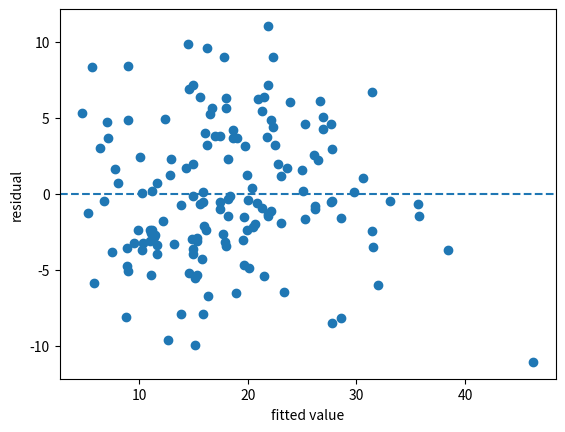

In [53]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")

#### 잔차가 y=0 기준으로 랜덤하게 분포하고 있으므로 등분산성을 만족한다고 볼 수 있습니다.

# 잔차의 가정 확인 : 정규성 검정

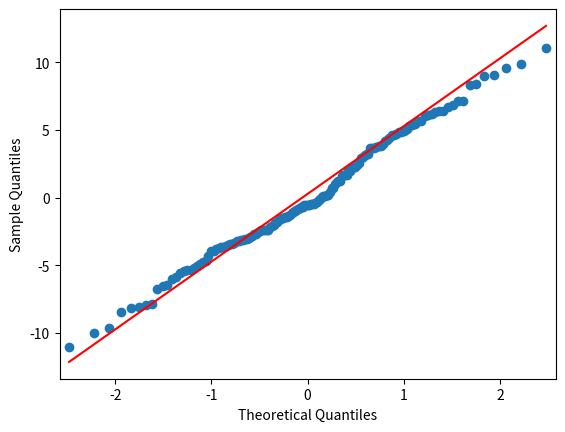

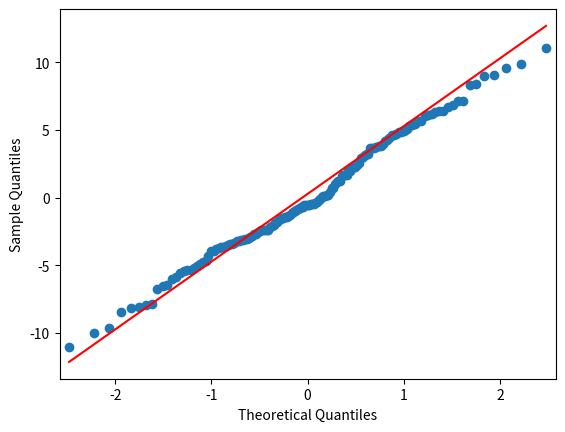

In [54]:
qqplot(reg_result.resid, line="q")

#### 적색 선을 따라서 분포하므로 정규분포를 따른다고 볼 수 있습니다.

# 잔차의 가정 확인 : 독립성 검정

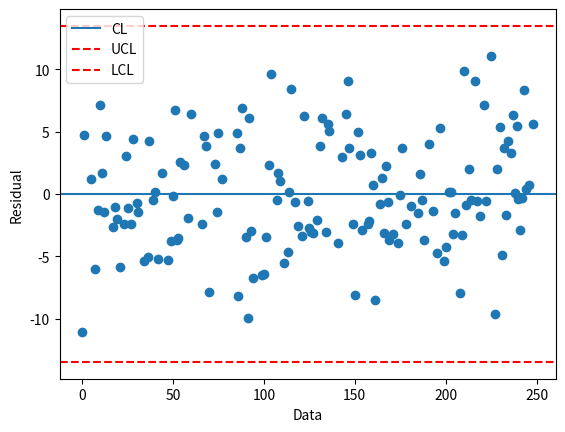

In [55]:
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data"); plt.ylabel("Residual")
plt.axhline(y=0, linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--",color="red", label='UCL')
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="dashed",color="red", label='LCL')
plt.legend(); plt.show()

#### 관리 상한, 하한의 벗어나지 않고, 규칙성없이 랜덤으로 분포하고 있으므로 독립성을 만족한다고 볼 수 있습니다.

# 최종 모델

#### 먼저 결측치는 없었지만, 데이터 수가 매우 적다고 판단하여 이상치 제거는 따로 해주지 않았습니다. 

#### 잔차는 정규성, 등분산성, 독립성을 전부 만족하므로 회귀분석을 사용할 수 있습니다.

#### p-value에 따라서 유의미하지 않다고 판단되는 변수를 제거하면서 성능을 확인하였을 때, AGE,NECK,ABDOMEN,HIP,FOREARM,WRIST 6개의 변수만 남겼을 때 69.195%, AGE+NECK+CHEST+ABDOMEN+HIP+THIGH+BICEPS+FOREARM+WRIST 9개 변수가 남아있을 때 69.261%로 가장 크게 나왔습니다. 하지만 샘플링된 값에 따라 69.195% 와 69.261%의 값은 달라질 수 있고 거의 같다라고 생각하고 6개의 변수를 사용하는 것이 9개의 변수를 사용하는 것보다 경제적이기 때문에 최종 모델로 AGE,NECK,ABDOMEN,HIP,FOREARM,WRIST  6개 변수를 남긴 모델을 선정하였습니다.

In [56]:
reg_model=smf.ols(formula="FAT ~AGE+NECK+ABDOMEN+HIP+FOREARM+WRIST", data=df_train)
reg_result=reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     70.46
Date:                Mon, 07 Aug 2023   Prob (F-statistic):           2.18e-40
Time:                        05:09:20   Log-Likelihood:                -436.06
No. Observations:                 151   AIC:                             886.1
Df Residuals:                     144   BIC:                             907.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4206      8.891     -0.047      0.9

In [57]:
train_pred=reg_result.predict(df_train)
test_pred=reg_result.predict(df_test)
print("train data의 결정계수", r2_score(df_train['FAT'], train_pred))
print("test data의 결정계수", r2_score(df_test['FAT'], test_pred))


train data의 결정계수 0.7459153375424524
test data의 결정계수 0.6919559124982415


In [58]:
print('test data의 실제값:\n', df_test['FAT'].head(10))
print('test data의 예측값:\n', test_pred[:10])

test data의 실제값:
 235     6.6
3      10.6
110    25.3
105    22.5
61     24.9
196    22.1
140    40.1
198    11.5
15     25.8
184    10.8
Name: FAT, dtype: float64
test data의 예측값:
 235     5.827931
3      20.803834
110    16.371938
105    19.350849
61     22.536970
196    19.285331
140    37.386949
198    16.740401
15     26.654835
184    15.069805
dtype: float64


#### 평가 데이터의 10개 값의 예측값과 실제값을 확인해보았습니다.

<Axes: >

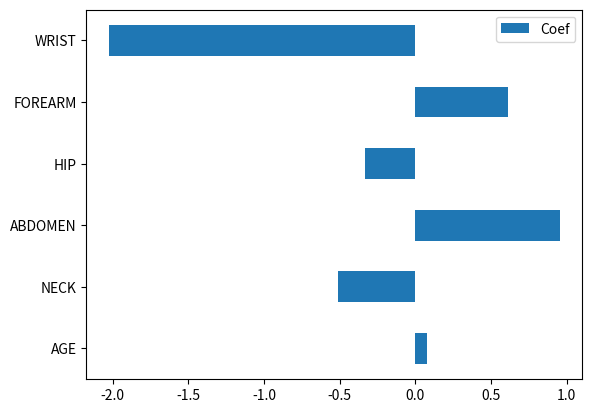

In [59]:
df_reg_coef=pd.DataFrame({"Coef":reg_result.params.values[1:]},
                        index=['AGE','NECK','ABDOMEN','HIP','FOREARM','WRIST'])
df_reg_coef.plot.barh(y="Coef")

#### 표를 확인해보면  WRIST와 NECK, HIP이 작아질수록, ABDOMEN와 FOREARM이 커질수록 FAT가 높다고 결론낼 수 있다.